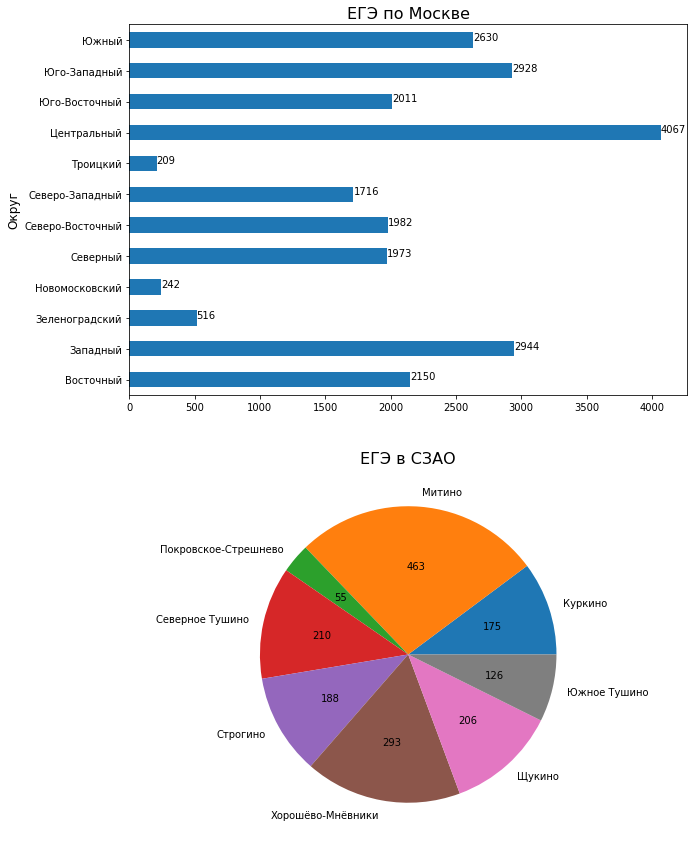

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv', delimiter=';')

data['District'] = data['District'].str.replace('район ', '').astype('category')
data['AdmArea'] = data['AdmArea'].apply(lambda x: x.split(' ')[0])
data = data.set_index('YEAR').loc['2018-2019'].reset_index()

# print(data.head())

data_adm = data.set_index('AdmArea')
data_1 = data_adm['PASSES_OVER_220'].groupby('AdmArea').sum()
data_2 = data_adm.loc['Северо-Западный'].reset_index().set_index('District')
# data_2 = data_2['PASSES_OVER_220'].groupby('District').sum()
data_2 = data_2.groupby('District').sum()['PASSES_OVER_220']

fig = plt.figure(figsize=(10, 15))
area = fig.add_subplot(2, 1, 1)
area.set_title('ЕГЭ по Москве', fontsize=16)
data_1.plot.barh(ax=area)
area.set_ylabel('Округ', fontsize=12)
y = 0
for x in data_1:
    area.annotate(x, xy=(x, y))
    y += 1

area = fig.add_subplot(2, 1, 2)
area.set_title('ЕГЭ в СЗАО', fontsize=16)
total = sum(data_2)
data_2.plot.pie(ax=area, label='', autopct=lambda x: int(round(x/100 * total)))

plt.show()